## what we're going to do?
First we will train two models, check accuracy as our data is skewed 

Than we will normalized our data and again check whether the accuracy increased or not 
### Logistic Regression 
(Got affected by skewed data coz one of assumption for using reg is that data will be in normalized form)
### Decision Tree
(Not affected by skewness of the data that's why we take this in order to compare results)

In [1]:
import pandas as pd
import numpy as np

# import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
## here we will import our Tranform fn 
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
## some fare values contain zero that creating problems so let's drop them 
df = df[~(df['Fare'] == 0)]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.shape

(876, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Age       707 non-null    float64
 2   Fare      876 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 27.4 KB


In [6]:
df.isnull().sum()

Survived      0
Age         169
Fare          0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

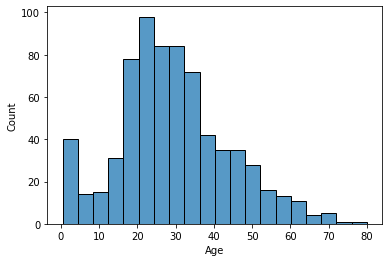

In [7]:
sns.histplot(df['Age'])

## let's fill the age with the average age 

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

## Here we can see that there is a lot more skewness in the data 

In [9]:
df.skew().sort_values()

Age         0.442338
Survived    0.454980
Fare        4.770117
dtype: float64

## distplot to check the distribution of the data 

### Let's split the data into train test split 

In [10]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


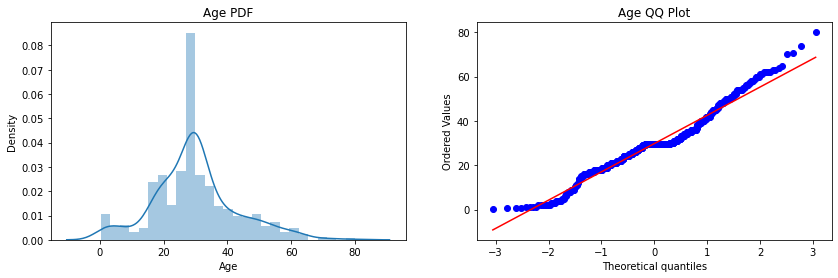

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


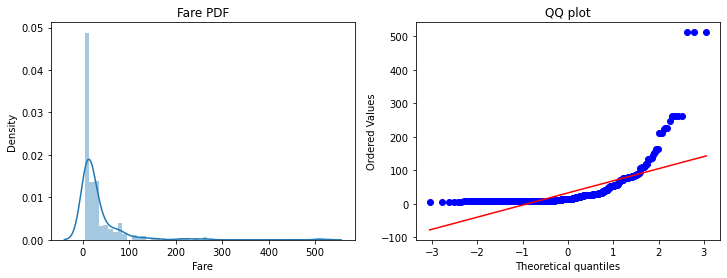

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('QQ plot')
plt.show()

### Objects of the model 

In [13]:
reg = LogisticRegression()
tree = DecisionTreeClassifier()

In [14]:
reg.fit(x_train,y_train)
tree.fit(x_train,y_train)

reg_pre = reg.predict(x_test)
tre_pre = tree.predict(x_test)

print("Reg Accuracy :",accuracy_score(y_test, reg_pre))
print('Tree Accuracy :', accuracy_score(y_test,tre_pre))

Reg Accuracy : 0.6463878326996197
Tree Accuracy : 0.6311787072243346


# 1= Log Transformation 
the log1p add a constant when value is zero so we dont need to care about zero value

### Transformation using Function Transformation 

In [15]:
trf = FunctionTransformer(func=np.log1p)

In [16]:
x_trained_transform = trf.fit_transform(x_train)
x_test_transform = trf.transform(x_test)

### For age, the log transformation did not performed well 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


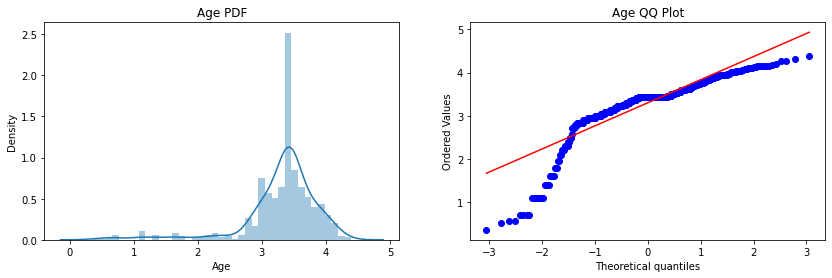

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_trained_transform['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_trained_transform['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

### But for Fare, it's  do pretty well 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


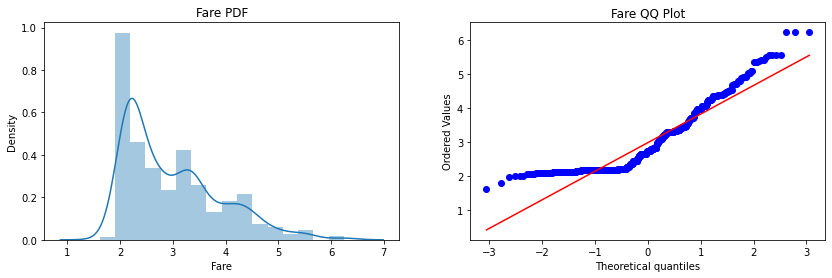

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_trained_transform['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_trained_transform['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

## Accuracy for the LR got increase but for DT it's remain same 

In [19]:
reg = LogisticRegression()
tree = DecisionTreeClassifier()
reg.fit(x_trained_transform,y_train)
tree.fit(x_trained_transform,y_train)

reg_pre = reg.predict(x_test_transform)
tre_pre = tree.predict(x_test_transform)

print("Reg Accuracy :",accuracy_score(y_test, reg_pre))
print('Tree Accuracy :', accuracy_score(y_test,tre_pre))

Reg Accuracy : 0.6463878326996197
Tree Accuracy : 0.6197718631178707


# 2 - Sqaure Transformation 

In [20]:
trf = FunctionTransformer(func=np.square)

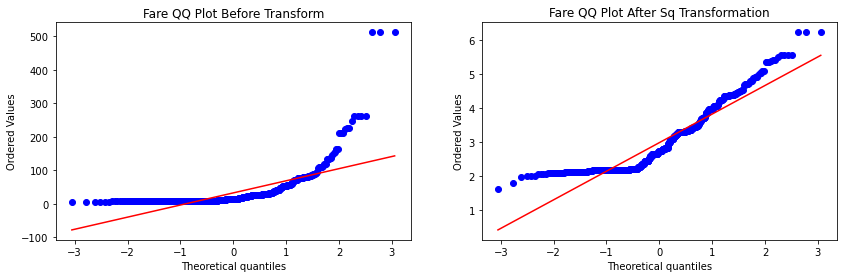

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot Before Transform')

plt.subplot(122)
stats.probplot(x_trained_transform['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot After Sq Transformation')

plt.show()

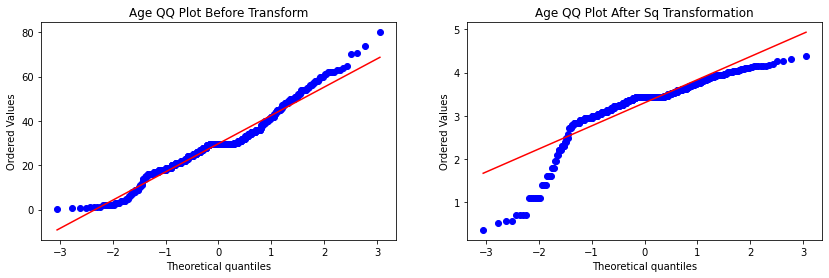

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot Before Transform')

plt.subplot(122)
stats.probplot(x_trained_transform['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot After Sq Transformation')

plt.show()

### Log transform didn't do well on this data 

In [23]:
x_trained_transform = trf.fit_transform(x_train)
x_test_transform = trf.transform(x_test)

reg = LogisticRegression()
tree = DecisionTreeClassifier()
reg.fit(x_trained_transform,y_train)
tree.fit(x_trained_transform,y_train)

reg_pre = reg.predict(x_test_transform)
tre_pre = tree.predict(x_test_transform)

print("Reg Accuracy :",accuracy_score(y_test, reg_pre))
print('Tree Accuracy :', accuracy_score(y_test,tre_pre))

Reg Accuracy : 0.6501901140684411
Tree Accuracy : 0.6311787072243346


# 3_Reciprocal Transformer 

In [24]:
x_train['Age_rec'] = 1/(x_train['Age'])
x_train['Fare_rec'] = 1/(x_train['Age'])

x_test['Age_rec'] = 1/(x_test['Age'])
x_test['Fare_rec'] = 1/(x_test['Fare'])

In [25]:
x_train.head()

,Age,Fare,Age_rec,Fare_rec
836,21.0,8.6625,0.047619,0.047619
182,9.0,31.3875,0.111111,0.111111
848,28.0,33.0000,0.035714,0.035714
69,26.0,8.6625,0.038462,0.038462
131,20.0,7.0500,0.050000,0.050000


In [26]:
x_train.head()

,Age,Fare,Age_rec,Fare_rec
836,21.0,8.6625,0.047619,0.047619
182,9.0,31.3875,0.111111,0.111111
848,28.0,33.0000,0.035714,0.035714
69,26.0,8.6625,0.038462,0.038462
131,20.0,7.0500,0.050000,0.050000


In [27]:
rec = x_train.iloc[:,2:]
rec_test = x_test.iloc[:,2:]
rec.head()
rec_test.head()

,Age_rec,Fare_rec
370,0.040000,0.018037
665,0.031250,0.013605
843,0.028986,0.155340
703,0.040000,0.129171
214,0.033732,0.129032


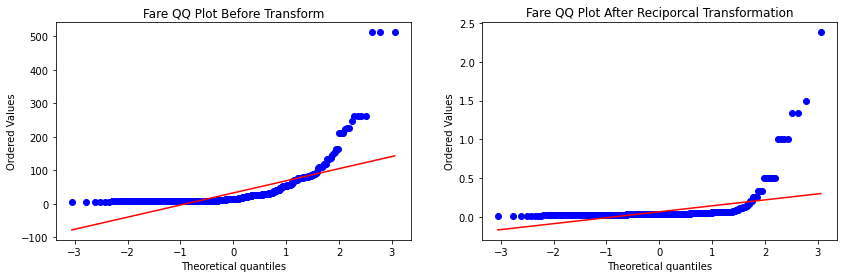

In [28]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot Before Transform')

plt.subplot(122)
stats.probplot(rec['Fare_rec'], dist="norm", plot=plt)
plt.title('Fare QQ Plot After Reciporcal Transformation')

plt.show()

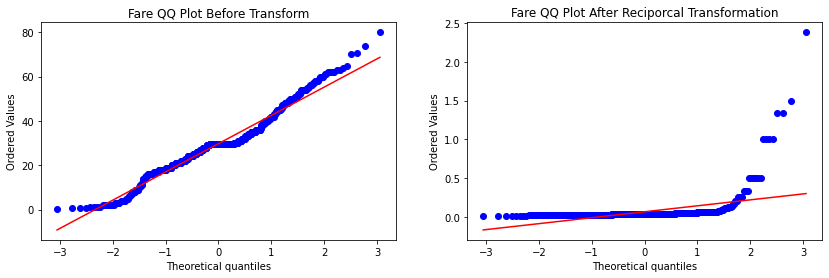

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Fare QQ Plot Before Transform')

plt.subplot(122)
stats.probplot(rec['Age_rec'], dist="norm", plot=plt)
plt.title('Fare QQ Plot After Reciporcal Transformation')

plt.show()

In [30]:
rec_test.max()

Age_rec     1.204819
Fare_rec    0.155340
dtype: float64

In [31]:
rec_test.min()

Age_rec     0.014085
Fare_rec    0.003802
dtype: float64

In [32]:
rec_test.isnull().sum()

Age_rec     0
Fare_rec    0
dtype: int64

In [33]:
reg = LogisticRegression()
tree = DecisionTreeClassifier()

reg.fit(rec,y_train)
tree.fit(rec,y_train)

reg_pre = reg.predict(rec_test)
tre_pre = tree.predict(rec_test)

print("Reg Accuracy :",accuracy_score(y_test, reg_pre))
print('Tree Accuracy :', accuracy_score(y_test,tre_pre))

Reg Accuracy : 0.6463878326996197
Tree Accuracy : 0.38022813688212925


## Log Transform 

In [39]:
import numpy as np 

In [40]:
x = np.log(df['Age'])

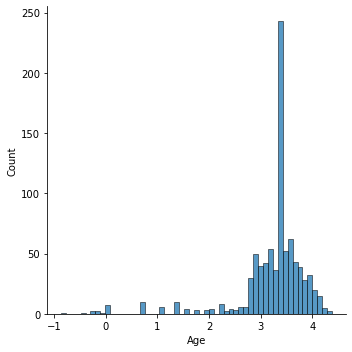

In [41]:
sns.displot(x)

## Square root transforamtion 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

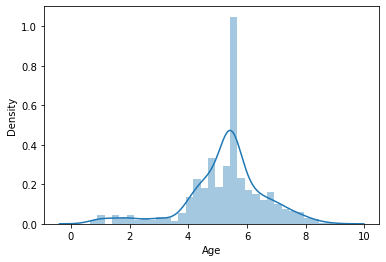

In [42]:
y = df['Age']**(0.5)
sns.distplot(y)

# Reciprocal Transformation

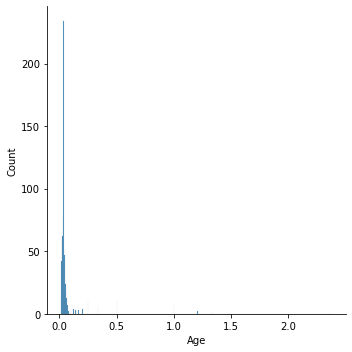

In [43]:
z = 1/df['Age']
sns.displot(z)